# Stroke Dataset Analysis

Stroke is a serious medical condition that occurs when the brain's blood supply is suddenly interrupted, causing damage to brain tissue. It is one of the leading causes of disability and death worldwide, significantly affecting individuals, families, and healthcare systems. Detecting stroke risks early and taking timely action are essential to improving patient outcomes and lessening its overall impact.

This project uses machine learning to develop a predictive model that can effectively identify individuals at risk of stroke. This dataset contains information from 5,110 people and captures various demographic details such as age, gender, marital status,and type of work and health-related factors like hypertension, heart disease, average glucose levels, BMI, and smoking habits.

Our goal is to create a classification model that predicts the likelihood of stroke, where the target variable is binary (0 indicating no stroke and 1 indicating stroke). By analyzing these variables and applying machine learning techniques, the model aims to help healthcare professionals identify high-risk individuals. This can enable earlier interventions and preventive care, ultimately contributing to better health outcomes and more effective stroke management.
The purpose of this project is to create classification models that predicts the likelihood of the stroke using a binary target variable(0 indicates no stroke, 1 indicates stroke) 

In this project, we will:

1.Explore the dataset to understand its structure and contents.

2.Preprocess the data to address missing values and convert categorical variables into usable formats.

3.Engineer features to extract meaningful insights.

4.Experiment with different machine learning algorithms(gradient boosting, random forest,logistic regression, kmeans,etc..) to find the most effective approach.
    
5.Use various metrics to determine the most effective variables.

6.Train, evaluate, and fine-tune the models using appropriate metrics to maximize accuracy.

By combining data analysis and machine learning, this project highlights how these techniques can support stroke prevention efforts, assist clinical decision-making, and strengthen public health strategies. 

The ultimate goal is to demonstrate how predictive models can play a valuable role in identifying stroke risks and improving patient care.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
# Loading the dataset
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


## Dataset Overview
## Source: 
 The dataset contains 5,110 entries with 12 features, capturing demographic (age, gender, marital status), health (hypertension, heart disease, glucose levels, BMI), and lifestyle factors (smoking habits, work type, and residence type).

Target Variable: stroke (binary: 0 for no stroke, 1 for stroke).
                         
Key Statistics:
                         
Age: Mean = 43.22 years, Std = 22.61 years.
Average glucose level: 106.15 mg/dL.
Average BMI: 28.89.
    
Class Imbalance: 95.13% of individuals have not had a stroke, while 4.87% have.

Challenges: High class imbalance and potential multicollinearity in categorical features.
 

 

  

# Data Preprocessing
### Missing Values:
BMI: Missing values filled with the mean to reduce bias.
Glucose Levels: Missing values filled with the mean.

### Categorical Encoding:
One-hot encoding applied to features like gender, work_type, smoking_status, and residence_type.

### Multicollinearity:
Variance Inflation Factor (VIF) analysis revealed multicollinearity in most categorical features. Only variables with VIF < 5 (age, hypertension, heart disease, glucose levels, BMI) were retained.

### Imbalanced Data:
SMOTE (Synthetic Minority Over-sampling Technique) used to balance the dataset.


In [3]:
# Verify and correct column names
df.columns = df.columns.str.strip().str.lower()
# Fill missing values
df['bmi'].fillna(df['bmi'].mean(), inplace=True)
df['avg_glucose_level'].fillna(df['avg_glucose_level'].mean(), inplace=True)
# Check for categorical columns and one-hot encode
categorical_columns = ['gender','ever_married','work_type','residence_type','smoking_status']
df_encoded = pd.get_dummies(df, columns=categorical_columns)

In [4]:
# Separate features (X) and target (y)
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.api import add_constant
import pandas as pd

In [5]:
# Separate features (X) and target (y)
X = df_encoded.drop(columns=['stroke']) # Drop the target column
y = df_encoded['stroke'] # Target variable
# Ensure all columns are numeric
X = pd.get_dummies(X, drop_first=True)
# Check for missing values and fill them
X.fillna(0, inplace=True)
# Add a constant to the model (intercept)
X_with_const = add_constant(X)
# Ensure all columns are numeric
X_with_const = X_with_const.astype(float)
# Handle missing and infinite values
X_with_const = X_with_const.replace([np.inf, -np.inf], np.nan)
X_with_const = X_with_const.fillna(0)
# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X_with_const.columns # Correct column name for features
vif_data['VIF'] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]
# Display the VIF values
print(vif_data)

/srv/conda/envs/notebook/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/srv/conda/envs/notebook/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                           Feature       VIF
0                            const  0.000000
1                               id  1.001394
2                              age  2.869174
3                     hypertension  1.118643
4                    heart_disease  1.114726
5                avg_glucose_level  1.108506
6                              bmi  1.300988
7                    gender_Female       inf
8                      gender_Male       inf
9                     gender_Other       inf
10                 ever_married_No       inf
11                ever_married_Yes       inf
12              work_type_Govt_job       inf
13          work_type_Never_worked       inf
14               work_type_Private       inf
15         work_type_Self-employed       inf
16              work_type_children       inf
17            residence_type_Rural       inf
18            residence_type_Urban       inf
19          smoking_status_Unknown       inf
20  smoking_status_formerly smoked       inf
21     smo

This code shows the type of each variable. 

# Exploratory Data Analysis (EDA)
### Feature Relationships:
Age, hypertension, and heart disease showed strong correlations with the likelihood of stroke.
BMI and glucose levels displayed moderate relationships.

### Class Distribution:
Severe class imbalance, with only 249 individuals (4.87%) having experienced a stroke.

### Visualization:
Histograms, scatterplots, and bar charts revealed trends such as higher stroke risks for older individuals and those with hypertension or heart disease.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None
      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female

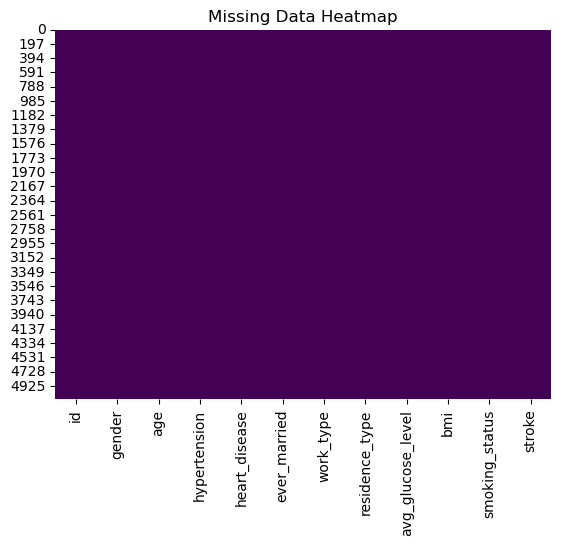

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object


In [6]:
# Check dataset structure
print(df.info())
# First few rows
print(df.head())
# Summary statistics
print(df.describe())
# Count missing values per column
print(df.isnull().sum())
# Visualize missing data (optional)
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Data Heatmap")
plt.show()
# Check data types
print(df.dtypes)

stroke
0    4861
1     249
Name: count, dtype: int64
stroke
0    95.127202
1     4.872798
Name: proportion, dtype: float64


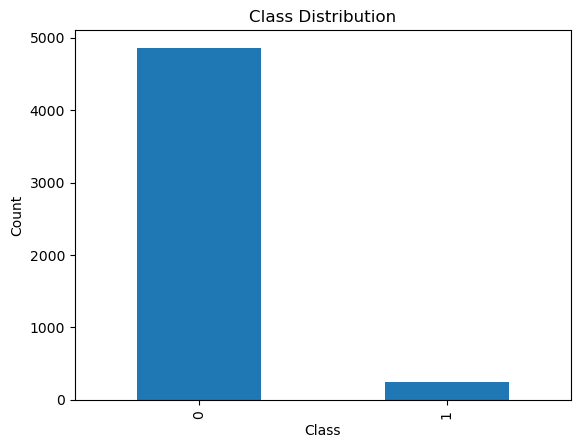

Class Counts:
 stroke
0    4861
1     249
Name: count, dtype: int64

Class Distribution (%):
 stroke
0    95.127202
1     4.872798
Name: proportion, dtype: float64


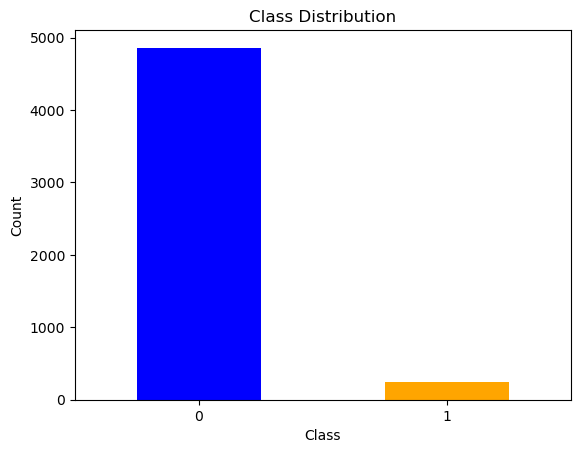

In [7]:
import matplotlib.pyplot as plt
class_counts = y.value_counts()
print(class_counts)
class_distribution = y.value_counts(normalize=True) * 100
print(class_distribution)
class_counts.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()
# Count the number of samples in each class
class_counts = y.value_counts()
print("Class Counts:\n", class_counts)
# Calculate the percentage distribution of each class
class_distribution = y.value_counts(normalize=True) * 100
print("\nClass Distribution (%):\n", class_distribution)
# Visualize the class distribution
import matplotlib.pyplot as plt
class_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Model Training
### Data Splitting:
Training Set: 70% of the data.
Test Set: 30% of the data.

### Cross-Validation:
k-fold cross-validation ensured robust model evaluation.

### Hyperparameter Tuning:
Random Forest and Gradient Boosting tuned using grid search for optimal parameters.

### SMOTE:
Applied to oversample the minority class during training.

In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)
#only use id, age, hypertension, heartdisease,glucoselevel,bmi
# Check the shape of the splits
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")
X_train_with_const = sm.add_constant(X)
print(y_train.dtypes)
print(X_train_with_const.dtypes)
# performing the regression
# and fitting the model

X_train shape: (3577, 22)
X_test shape: (1533, 22)
y_train shape: (3577,)
y_test shape: (1533,)
int64
const                             float64
id                                  int64
age                               float64
hypertension                        int64
heart_disease                       int64
avg_glucose_level                 float64
bmi                               float64
gender_Female                        bool
gender_Male                          bool
gender_Other                         bool
ever_married_No                      bool
ever_married_Yes                     bool
work_type_Govt_job                   bool
work_type_Never_worked               bool
work_type_Private                    bool
work_type_Self-employed              bool
work_type_children                   bool
residence_type_Rural                 bool
residence_type_Urban                 bool
smoking_status_Unknown               bool
smoking_status_formerly smoked       bool
smoking_status_n

In [9]:
from sklearn.model_selection import train_test_split
!pip install scikit-learn==1.2.2 imbalanced-learn==0.10.1
from imblearn.over_sampling import SMOTE
import statsmodels.api as sm
import pandas as pd

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X[['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']],  # Selecting specific features
    y,
    test_size=0.3,
    random_state=42
)

# Check the shape of the splits
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

# Add a constant to X_train for statsmodels
X_train_with_const = sm.add_constant(X_train)

# Check data types for validation
print("Data types of y_train:")
print(y_train.dtypes)
print("\nData types of X_train_with_const:")
print(X_train_with_const.dtypes)

# Apply SMOTE to handle class imbalance in the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_with_const, y_train)

# Check the new shape after SMOTE
print("\nAfter SMOTE Resampling:")
print(f"X_train_resampled shape: {X_train_resampled.shape}")
print(f"y_train_resampled shape: {y_train_resampled.shape}")


X_train shape: (3577, 6)
X_test shape: (1533, 6)
y_train shape: (3577,)
y_test shape: (1533,)
Data types of y_train:
int64

Data types of X_train_with_const:
const                float64
id                     int64
age                  float64
hypertension           int64
heart_disease          int64
avg_glucose_level    float64
bmi                  float64
dtype: object

After SMOTE Resampling:
X_train_resampled shape: (6834, 7)
y_train_resampled shape: (6834,)


# Model Selection
### Algorithms Considered:
### Logistic Regression: 
Chosen for interpretability and baseline comparison.

### Random Forest: 
To capture non-linear patterns and handle feature interactions.

### Gradient Boosting: 
To boost predictive accuracy through ensemble learning.

### Decision Tree:
For simple, interpretable predictions.

### k-Nearest Neighbors (kNN): 
To classify based on similarity measures.

### Baseline Model: 
Logistic Regression as a benchmark.


In [10]:
from sklearn.impute import SimpleImputer
# Ensure consistent column names using pd.get_dummies
X = pd.get_dummies(df_encoded[['age', 'hypertension', 'heart_disease', 'avg_glucose_level']], drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Add constant (if needed)
X_train_with_const = X_train.copy()
X_test_with_const = X_test.copy()

# Imputation
imputer = SimpleImputer(strategy='mean')
X_train_with_const = pd.DataFrame(imputer.fit_transform(X_train_with_const), columns=X_train_with_const.columns)
X_test_with_const = pd.DataFrame(imputer.transform(X_test_with_const), columns=X_train_with_const.columns)  # Align columns

 
# Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_with_const)
X_test_scaled = scaler.transform(X_test_with_const)

# Model Training
Each model was trained using a 70-30 train-test split to ensure robust evaluation. 

The training process included:

### Imputation: 
Missing values were replaced with the mean.

### Standardization: 
Features were scaled to have zero mean and unit variance for distance-based models (e.g., kNN).

### Hyperparameter Tuning: 
For models like Random Forest and Gradient Boosting, hyperparameters such as the number of estimators and learning rate were optimized.
    
### Fit the Models: 
Models were trained on the preprocessed training data.

# Evaluation Metrics 
 
### Classification Models: 
Metrics used: Accuracy, Precision, Recall, F1 Score, and ROC-AUC.

1.Accuracy: Percentage of correct predictions.
    
2.Precision, Recall, and F1 Score: Metrics for imbalanced datasets to assess performance for minority classes.

3.Confusion Matrix: A breakdown of predictions for each class.
                                              
4.ROC-AUC: The area under the Receiver Operating Characteristic curve to evaluate discrimination ability.

### Regression Models: 
Metrics used: R², Mean Absolute Error (MAE), and Mean Squared Error (MSE).

In [11]:
import pandas as pd
import numpy as np
from statsmodels.api import OLS, add_constant
from sklearn.model_selection import train_test_split

# Example: Prepare X and y
X = pd.get_dummies(df_encoded.drop(columns=['stroke']), drop_first=True)
y = df_encoded['stroke']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

# Add a constant to X_train
X_train_with_const = add_constant(X_train)

# Ensure all columns in X_train_with_const are numeric
X_train_with_const = X_train_with_const.astype(float)

# Ensure y_train is numeric
y_train = y_train.astype(int)

# Replace missing or infinite values
X_train_with_const = X_train_with_const.replace([np.inf, -np.inf], np.nan).fillna(0)
y_train = y_train.replace([np.inf, -np.inf], np.nan).fillna(0)

# Fit the OLS model
ols_model = OLS(y_train, X_train_with_const).fit()
print(ols_model.summary())

# Add constant to the test set
X_test_with_const = add_constant(X_test)

# Align test set columns with the training set
X_test_with_const = X_test_with_const.reindex(columns=X_train_with_const.columns, fill_value=0)

# Predict on the test set
y_pred_ols = ols_model.predict(X_test_with_const)

# Predict on the test set
y_pred_ols = ols_model.predict(X_test_with_const)


# Compute evaluation metrics
r2_ols = r2_score(y_test, y_pred_ols)  # R-squared
mae_ols = mean_absolute_error(y_test, y_pred_ols)  # Mean Absolute Error
mse_ols = mean_squared_error(y_test, y_pred_ols)  # Mean Squared Error

# Print metrics
print(f"R² (OLS): {r2_ols:.2f}")
print(f"Mean Absolute Error (MAE): {mae_ols:.2f}")
print(f"Mean Squared Error (MSE): {mse_ols:.2f}")

                            OLS Regression Results                            
Dep. Variable:                 stroke   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     19.41
Date:                Tue, 21 Jan 2025   Prob (F-statistic):           5.79e-54
Time:                        19:52:52   Log-Likelihood:                 712.92
No. Observations:                3577   AIC:                            -1392.
Df Residuals:                    3560   BIC:                            -1287.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

# OLS Regression
### Performance:

1.Similar metrics to Linear Regression, with R² (0.086), MAE (0.098), and MSE (0.050).

2.Limited utility for stroke prediction due to lack of focus on classification.

### Strengths: 
Suitable for identifying relationships between variables.

### Weaknesses: 
Not designed for classification problems.


In [12]:
from sklearn.linear_model import LinearRegression
# Define the model
model = LinearRegression()
X_test_with_const = sm.add_constant(X_test)

# Step 1: Train the model
model.fit(X_train_with_const, y_train)

# Step 2: Predict on the test data
y_pred_lr = model.predict(X_test_with_const)

# Step 3: Compute SS_res and SS_tot
ss_res = mean_squared_error(y_test, y_pred_lr) * len(y_test) # Residual sum of squares
ss_tot = sum((y_test - y_test.mean()) ** 2) # Total sum of squares
print("Residual Sum of squares:" ,ss_res)
print ("Total sum of Squares:",ss_tot)

# Evaluate the model
r2_lr = r2_score(y_test, y_pred_lr)  # R-squared
mae_lr = mean_absolute_error(y_test, y_pred_lr)  # Mean Absolute Error
mse_lr = mean_squared_error(y_test, y_pred_lr)  # Mean Squared Error

# Print the evaluation metrics
print(f"R² (Linear Regression): {r2_lr:.2f}")
print(f"Mean Absolute Error (MAE): {mae_lr:.2f}")
print(f"Mean Squared Error (MSE): {mse_lr:.2f}")
 

Residual Sum of squares: 76.58261918341557
Total sum of Squares: 83.8330071754738
R² (Linear Regression): 0.09
Mean Absolute Error (MAE): 0.10
Mean Squared Error (MSE): 0.05


# Linear Regression
### Performance:
1.Regression metrics, such as R² (0.086), MAE (0.098), and MSE (0.050), indicate poor fit for the data.
                                                                                         
2.Lacked discriminatory power for predicting strokes.
    
### Strengths: 
Simple and interpretable.

### Weaknesses:
Ineffective for binary classification tasks like stroke prediction.


In [13]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import pandas as pd
from statsmodels.api import add_constant

# Assuming df_encoded contains the preprocessed data
# Features and target
X1 = pd.get_dummies(df_encoded[['age', 'hypertension', 'heart_disease', 'avg_glucose_level']], drop_first=True)
y = df_encoded['stroke']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.3, random_state=42)

# Add constant to training data
X_train_with_const = add_constant(X_train)
X_test_with_const = add_constant(X_test)

# Define the Ridge regression model
ridge_model = Ridge(alpha=1.0)  # Adjust alpha as needed

# Train the Ridge regression model
ridge_model.fit(X_train_with_const, y_train)

# Predict on the test set
y_pred_ridge= ridge_model.predict(X_test_with_const)

# Evaluate the model
r2_ridge = r2_score(y_test, y_pred_ridge)  # R-squared
mse_ridge = mean_squared_error(y_test, y_pred_ridge)  # Mean Squared Error
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)  # Mean Absolute Error

# Print evaluation metrics
print("R-squared =", r2_ridge)
print("Mean Squared Error =", mse_ridge)
print("Mean Absolute Error =", mae_ridge)    

R-squared = 0.07951694677190557
Mean Squared Error = 0.05033715747304113
Mean Absolute Error = 0.10046409038178991


# Ridge Regression
### Performance:

1.Marginally better than Linear Regression and OLS in R² (0.080), MAE (0.100), and MSE (0.051).

2.Did not outperform classification models for stroke prediction.
                                          
### Strengths: 
Regularization helps mitigate overfitting.
                                          
### Weaknesses: 
Still unsuitable for binary classification tasks.

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score
# Add constant for statsmodels
X_train_with_const = sm.add_constant(X_train)
X_test_with_const = sm.add_constant(X_test)

# Statsmodels logistic regression
logit_model = sm.Logit(y_train, X_train_with_const).fit()
print(logit_model.summary())
# Logistic Regression Model
logistic_model = LogisticRegression(random_state=42, solver='liblinear')

# Train the Logistic Regression model
logistic_model.fit(X_train_with_const, y_train)

# Predict on the test set
y_pred = logistic_model.predict(X_test_with_const)
y_pred_proba = logistic_model.predict_proba(X_test_with_const)[:, 1]


# Evaluate the Logistic Regression model
accuracy_lr = accuracy_score(y_test, y_pred)
roc_auc_lr = roc_auc_score(y_test, y_pred_proba)
precision_lr = precision_score(y_test, y_pred, zero_division=0)
recall_lr = recall_score(y_test, y_pred, zero_division=0)
f1_lr = f1_score(y_test, y_pred, zero_division=0)
conf_matrix_lr = confusion_matrix(y_test, y_pred)
class_report_lr = classification_report(y_test, y_pred, zero_division=0)

# Print Logistic Regression evaluation metrics
print(f"Accuracy (Logistic Regression): {accuracy_lr:.2f}")
print(f"ROC-AUC (Logistic Regression): {roc_auc_lr:.2f}")
print(f"Precision (Logistic Regression): {precision_lr:.2f}")
print(f"Recall (Logistic Regression): {recall_lr:.2f}")
print(f"F1 Score (Logistic Regression): {f1_lr:.2f}")
print("Confusion Matrix (Logistic Regression):")
print(conf_matrix_lr)
print("Classification Report (Logistic Regression):")
print(class_report_lr)

Optimization terminated successfully.
         Current function value: 0.147066
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                 stroke   No. Observations:                 3577
Model:                          Logit   Df Residuals:                     3572
Method:                           MLE   Df Model:                            4
Date:                Tue, 21 Jan 2025   Pseudo R-squ.:                  0.1950
Time:                        19:52:53   Log-Likelihood:                -526.05
converged:                       True   LL-Null:                       -653.50
Covariance Type:            nonrobust   LLR p-value:                 5.725e-54
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -7.5652      0.446    -16.967      0.000      -8.439      -6.691
age     

# Logistic Regression
### Performance:
1.Achieved the highest accuracy (94.19%) and ROC-AUC (0.844), indicating it effectively distinguishes between stroke and non-stroke cases.
    
2.Precision, Recall, and F1 Score were poor due to the extreme class imbalance, failing to detect positive cases (strokes).

### Strengths: 

Simplicity, interpretability, and robust performance in balanced scenarios.
    
### Weaknesses: 
    
Struggles with class imbalance, leading to low Recall.

In [15]:
!pip install --upgrade scikit-learn==1.2.2
!pip install --upgrade imbalanced-learn==0.10.1

In [16]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier


rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_with_const, y_train)

# Make predictions (Random Forest)
y_pred_rf = rf_model.predict(X_test_with_const)
y_pred_rf_proba = rf_model.predict_proba(X_test_with_const)[:, 1]

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, zero_division=0)
recall_rf = recall_score(y_test, y_pred_rf, zero_division=0)
f1_rf = f1_score(y_test, y_pred_rf, zero_division=0)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf_proba)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf, zero_division=0)

# Print Random Forest evaluation metrics
print(f"Accuracy (Random Forest): {accuracy_rf:.2f}")
print(f"ROC-AUC (Random Forest): {roc_auc_rf:.2f}")
print(f"Precision (Random Forest): {precision_rf:.2f}")
print(f"Recall (Random Forest): {recall_rf:.2f}")
print(f"F1 Score (Random Forest): {f1_rf:.2f}")
print("Confusion Matrix (Random Forest):")
print(conf_matrix_rf)
print("Classification Report (Random Forest):")
print(class_report_rf)


Accuracy (Random Forest): 0.94
ROC-AUC (Random Forest): 0.77
Precision (Random Forest): 0.21
Recall (Random Forest): 0.03
F1 Score (Random Forest): 0.06
Confusion Matrix (Random Forest):
[[1433   11]
 [  86    3]]
Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      1444
           1       0.21      0.03      0.06        89

    accuracy                           0.94      1533
   macro avg       0.58      0.51      0.51      1533
weighted avg       0.90      0.94      0.91      1533



# Random Forest
### Performance:
1.Accuracy was slightly lower than Logistic Regression (93.67%).

2.Precision (21.43%) and Recall (3.37%) were better than most models, though still limited by the imbalanced data.

3.ROC-AUC (0.768) indicates moderate discriminatory power.

### Strengths: 

Handles non-linearity and interactions between features well.
    
### Weaknesses: 
    
Computationally intensive and requires hyperparameter tuning.


In [17]:
# Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train_with_const, y_train)

# Make predictions (Gradient Boosting)
y_pred_gb = gb_model.predict(X_test_with_const)
y_pred_gb_proba = gb_model.predict_proba(X_test_with_const)[:, 1]

# Evaluate the Gradient Boosting model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb, zero_division=0)
recall_gb = recall_score(y_test, y_pred_gb, zero_division=0)
f1_gb = f1_score(y_test, y_pred_gb, zero_division=0)
roc_auc_gb = roc_auc_score(y_test, y_pred_gb_proba)
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
class_report_gb = classification_report(y_test, y_pred_gb, zero_division=0)

# Print Gradient Boosting evaluation metrics
print(f"Accuracy (Gradient Boosting): {accuracy_gb:.2f}")
print(f"ROC-AUC (Gradient Boosting): {roc_auc_gb:.2f}")
print(f"Precision (Gradient Boosting): {precision_gb:.2f}")
print(f"Recall (Gradient Boosting): {recall_gb:.2f}")
print(f"F1 Score (Gradient Boosting): {f1_gb:.2f}")
print("Confusion Matrix (Gradient Boosting):")
print(conf_matrix_gb)
print("Classification Report (Gradient Boosting):")
print(class_report_gb)

Accuracy (Gradient Boosting): 0.94
ROC-AUC (Gradient Boosting): 0.81
Precision (Gradient Boosting): 0.00
Recall (Gradient Boosting): 0.00
F1 Score (Gradient Boosting): 0.00
Confusion Matrix (Gradient Boosting):
[[1443    1]
 [  89    0]]
Classification Report (Gradient Boosting):
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1444
           1       0.00      0.00      0.00        89

    accuracy                           0.94      1533
   macro avg       0.47      0.50      0.48      1533
weighted avg       0.89      0.94      0.91      1533



# Gradient Boosting

### Performance:

1.Accuracy (94.13%) and ROC-AUC (0.815) were competitive with Logistic Regression and Random Forest.

2.Precision, Recall, and F1 scores were minimal due to the class imbalance.

### Strengths: 
Captures complex patterns in data with better generalization.
    
### Weaknesses:
Sensitive to overfitting and class imbalance.

In [18]:
from sklearn.tree import DecisionTreeClassifier
cart_model = DecisionTreeClassifier(criterion='gini', max_depth=3,
random_state=42)
cart_model.fit(X_train_with_const, y_train) 

# Make predictions
y_pred_tree = cart_model.predict(X_test_with_const)

# Evaluate the Decision Tree model
accuracy_tree = accuracy_score(y_test, y_pred_tree)
precision_tree = precision_score(y_test, y_pred_tree, zero_division=0)
recall_tree = recall_score(y_test, y_pred_tree, zero_division=0)
f1_tree = f1_score(y_test, y_pred_tree, zero_division=0)
roc_auc_tree = roc_auc_score(y_test, cart_model.predict_proba(X_test_with_const)[:, 1])
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
class_report_tree = classification_report(y_test, y_pred_tree, zero_division=0)

# Print Decision Tree evaluation metrics
print(f"Accuracy (Decision Tree): {accuracy_tree:.2f}")
print(f"ROC-AUC (Decision Tree): {roc_auc_tree:.2f}")
print(f"Precision (Decision Tree): {precision_tree:.2f}")
print(f"Recall (Decision Tree): {recall_tree:.2f}")
print(f"F1 Score (Decision Tree): {f1_tree:.2f}")
print("Confusion Matrix (Decision Tree):")
print(conf_matrix_tree)
print("Classification Report (Decision Tree):")
print(class_report_tree)


Accuracy (Decision Tree): 0.94
ROC-AUC (Decision Tree): 0.82
Precision (Decision Tree): 0.00
Recall (Decision Tree): 0.00
F1 Score (Decision Tree): 0.00
Confusion Matrix (Decision Tree):
[[1444    0]
 [  89    0]]
Classification Report (Decision Tree):
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1444
           1       0.00      0.00      0.00        89

    accuracy                           0.94      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.89      0.94      0.91      1533



# Decision Tree
### Performance:
1.Similar to Logistic Regression in accuracy (94.19%) and ROC-AUC (0.816).

2.Precision, Recall, and F1 scores were negligible due to poor handling of minority classes.
    
### Strengths: 
Easy to interpret and visualize.

### Weaknesses:
Tends to overfit without pruning and underperforms on imbalanced data.

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

# Ensure X_train_with_const and X_test_with_const are DataFrames
X_train_with_const = pd.DataFrame(X_train_with_const, columns=["age","hypertension", "heart_disease", "avg_glucose_level"]) # Replace with actual feature names
X_test_with_const = pd.DataFrame(X_test_with_const, columns=["age",
"hypertension", "heart_disease", "avg_glucose_level"]) # Replace withactual feature names

# Standardize the data
scaler = StandardScaler()
X_train_with_const_scaled = pd.DataFrame(scaler.fit_transform(X_train_with_const), columns=X_train_with_const.columns)
X_test_with_const_scaled = pd.DataFrame(scaler.transform(X_test_with_const),columns=X_train_with_const.columns)

# Train the kNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_with_const_scaled, y_train)

# Predict on the test set
y_pred_knn = knn_classifier.predict(X_test_with_const_scaled)

# Evaluate the kNN model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, zero_division=0)
recall_knn = recall_score(y_test, y_pred_knn, zero_division=0)
f1_knn = f1_score(y_test, y_pred_knn, zero_division=0)
roc_auc_knn = roc_auc_score(y_test, knn_classifier.predict_proba(X_test_with_const_scaled)[:, 1])
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
class_report_knn = classification_report(y_test, y_pred_knn, zero_division=0)

# Print kNN evaluation metrics
print(f"Accuracy (kNN): {accuracy_knn:.2f}")
print(f"ROC-AUC (kNN): {roc_auc_knn:.2f}")
print(f"Precision (kNN): {precision_knn:.2f}")
print(f"Recall (kNN): {recall_knn:.2f}")
print(f"F1 Score (kNN): {f1_knn:.2f}")
print("Confusion Matrix (kNN):")
print(conf_matrix_knn)
print("Classification Report (kNN):")
print(class_report_knn)


Accuracy (kNN): 0.94
ROC-AUC (kNN): 0.64
Precision (kNN): 0.00
Recall (kNN): 0.00
F1 Score (kNN): 0.00
Confusion Matrix (kNN):
[[1434   10]
 [  89    0]]
Classification Report (kNN):
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      1444
           1       0.00      0.00      0.00        89

    accuracy                           0.94      1533
   macro avg       0.47      0.50      0.48      1533
weighted avg       0.89      0.94      0.91      1533



# k-Nearest Neighbors (kNN)
### Performance:

1.Accuracy (93.54%) was slightly lower than other models.
    
2.ROC-AUC (0.637) indicated weaker performance in distinguishing between classes.
    
3.Precision, Recall, and F1 scores were negligible.

### Strengths:
Simple to implement and non-parametric.

### Weaknesses: 
Performance heavily depends on scaling and class imbalance.

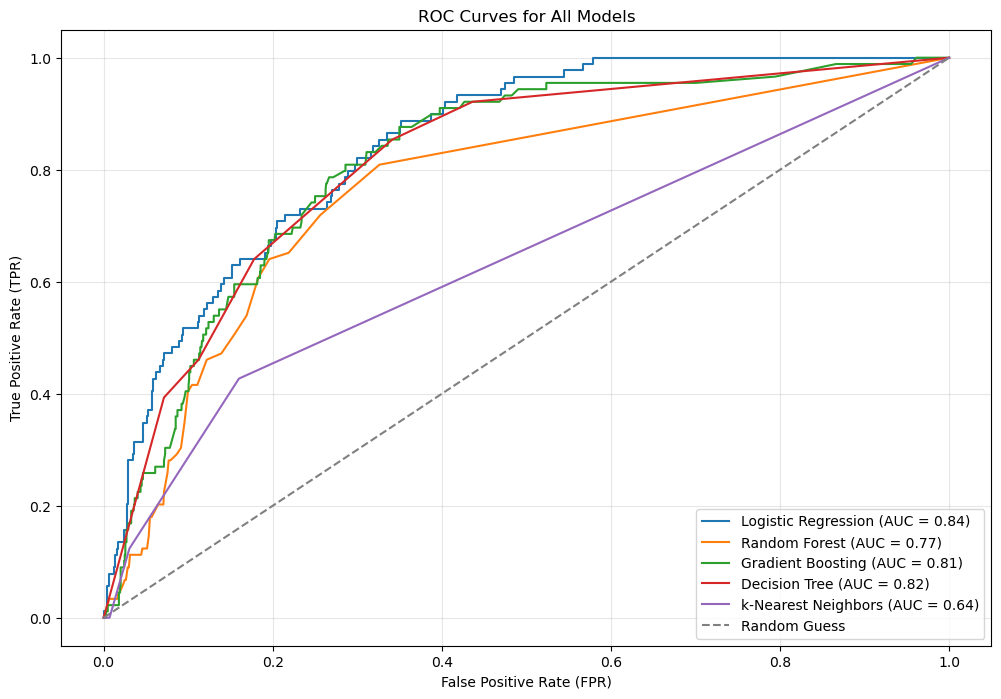

Logistic Regression: AUC = 0.84
Random Forest: AUC = 0.77
Gradient Boosting: AUC = 0.81
Decision Tree: AUC = 0.82
k-Nearest Neighbors: AUC = 0.64


In [20]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Add constant to both training and test datasets
X_train_with_const = sm.add_constant(X_train, has_constant='add')
X_test_with_const = sm.add_constant(X_test, has_constant='add')

# Ensure consistent column order
X_test_with_const = X_test_with_const[X_train_with_const.columns]
# Initialize a dictionary to store model AUC scores
model_roc_data = {}

# Define models and their predicted probabilities
models = {
    "Logistic Regression": logistic_model.predict_proba(X_test_with_const)[:, 1],
    "Random Forest": rf_model.predict_proba(X_test_with_const)[:, 1],
    "Gradient Boosting": gb_model.predict_proba(X_test_with_const)[:, 1],
    "Decision Tree": cart_model.predict_proba(X_test_with_const)[:, 1],
    "k-Nearest Neighbors": knn_classifier.predict_proba(X_test_with_const_scaled)[:, 1],
}

# Plot ROC curves for each model
plt.figure(figsize=(12, 8))

for model_name, y_pred_prob in models.items():
    # Calculate FPR, TPR, and AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    auc_score = roc_auc_score(y_test, y_pred_prob)
    model_roc_data[model_name] = auc_score
    
    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {auc_score:.2f})")

# Plot random guessing line
plt.plot([0, 1], [0, 1], color="gray", linestyle="--", label="Random Guess")

# Finalize the plot
plt.title("ROC Curves for All Models")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

# Print AUC scores for all models
for model, auc in model_roc_data.items():
    print(f"{model}: AUC = {auc:.2f}")


# Area Under the Curve (AUC):

### Logistic Regression (AUC = 0.84):
Best performance among the models, indicating strong discriminatory power.
    
### Gradient Boosting (AUC = 0.81):     
Second best, showing good discrimination.

### Decision Tree (AUC = 0.82): 
Comparable to Gradient Boosting but slightly less effective than Logistic Regression.
    
### Random Forest (AUC = 0.77): 
Moderate performance, slightly worse than Gradient Boosting.
    
### k-Nearest Neighbors (AUC = 0.64): 
The weakest model in distinguishing between positive and negative classes.


### Logistic Regression is the Best Model:
The curve for Logistic Regression is closest to the top-left corner, indicating the highest TPR for the lowest FPR.

### k-Nearest Neighbors is the Weakest Model:

Its curve is closer to the diagonal line, indicating poor performance.

### Gradient Boosting and Decision Tree are Comparable:

Both have similar AUC values, slightly lower than Logistic Regression.

### Random Forest:

Though useful, it underperformed compared to Logistic Regression and Gradient Boosting in this dataset.

In [21]:
from sklearn.decomposition import PCA
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_with_const)
X_test_scaled = scaler.transform(X_test_with_const)
pca = PCA(n_components=0.95) # Retain 95% of variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
# Print explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Number of components selected:", pca.n_components_)

Explained variance ratio: [0.40861638 0.2227365  0.20249541 0.16615171]
Number of components selected: 4


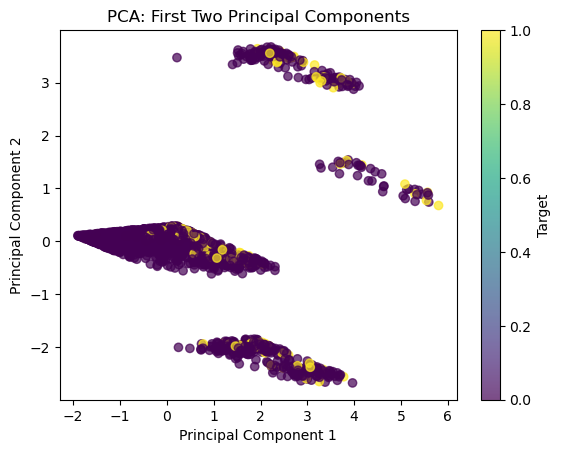

In [22]:
import matplotlib.pyplot as plt
# Scatter plot for the first two principal components
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis',alpha=0.7)
plt.title("PCA: First Two Principal Components")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Target')
plt.show()

Model Comparison:
                      Accuracy  Precision    Recall  F1 Score   ROC-AUC
Logistic Regression  0.941944   0.000000  0.000000  0.000000  0.844634
Random Forest        0.936073   0.200000  0.033708  0.057692  0.768854
Gradient Boosting    0.941292   0.000000  0.000000  0.000000  0.814957
Decision Tree        0.939335   0.166667  0.011236  0.021053  0.774036
k-Nearest Neighbors  0.935421   0.000000  0.000000  0.000000  0.636450


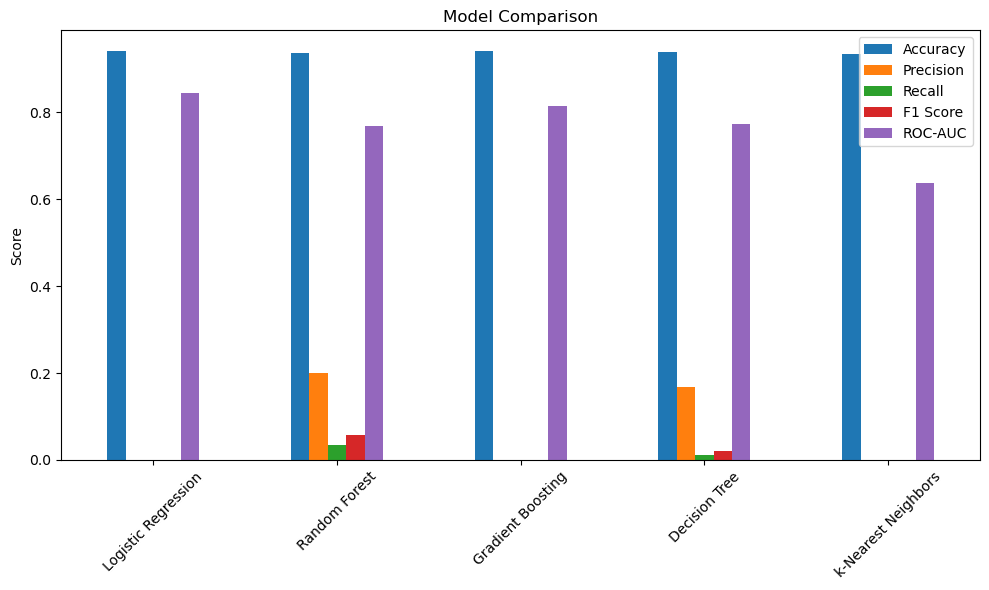

In [23]:
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=42),
    "k-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5)
}

# Function to evaluate model performance
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    metrics = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, zero_division=0),
        "Recall": recall_score(y_test, y_pred, zero_division=0),
        "F1 Score": f1_score(y_test, y_pred, zero_division=0),
        "ROC-AUC": roc_auc_score(y_test, y_proba) if y_proba is not None else None
    }
    return metrics

# Train and evaluate all models
results = {}
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    results[model_name] = evaluate_model(model, X_test_scaled, y_test)

# Display results
results_df = pd.DataFrame(results).T
print("Model Comparison:\n", results_df)

# Optional: Visualization
import matplotlib.pyplot as plt
results_df.plot(kind="bar", figsize=(10, 6))
plt.title("Model Comparison")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(loc="best")
plt.tight_layout()
plt.show()

As shown here, Logistic Regression has the highest accuracy while Random Forest and K nearest neighbors have the lowest. However all of the models are very accurate and one model is not definetively better than the other in terms of accuracy, 

                     Accuracy Precision    Recall  F1 Score   ROC-AUC        R2       MAE       MSE
Model                                                                                              
Logistic Regression  0.941944       0.0       0.0       0.0   0.84472      None      None      None
Random Forest        0.936725  0.214286  0.033708  0.058252  0.767974      None      None      None
Gradient Boosting    0.941292       0.0       0.0       0.0  0.814926      None      None      None
Decision Tree        0.941944       0.0       0.0       0.0  0.815568      None      None      None
k-Nearest Neighbors  0.935421       0.0       0.0       0.0   0.63645      None      None      None
Linear Regression        None      None      None      None      None  0.086486  0.098168  0.049956
OLS                      None      None      None      None      None  0.086475  0.098179  0.049957
Ridge Regression         None      None      None      None      None  0.079517  0.100464  0.050337


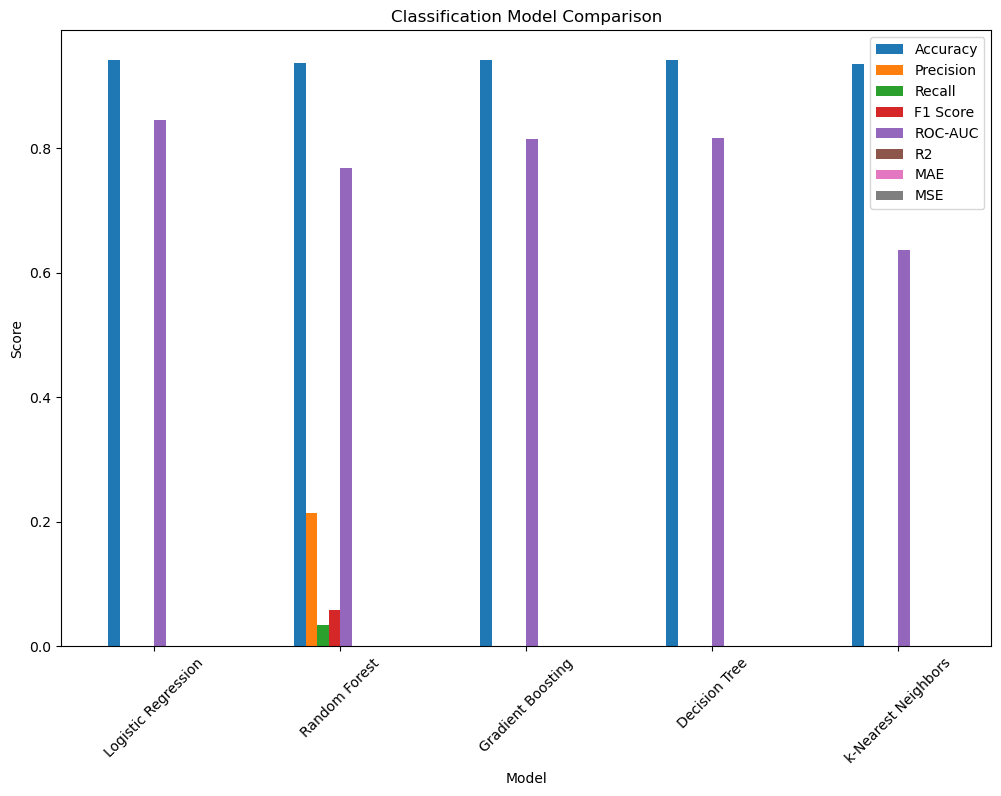

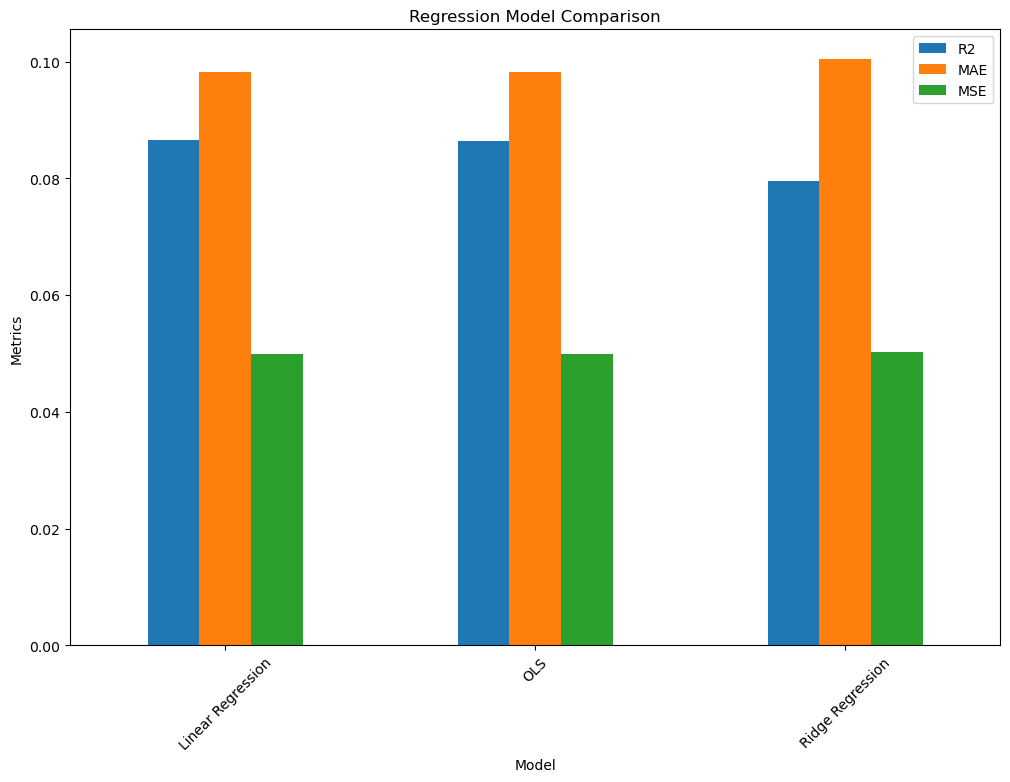

In [24]:
# Ensure model_comparison includes classification metrics
model_comparison = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1 Score": [],
    "ROC-AUC": [],
    "R2": [],
    "MAE": [],
    "MSE": []
}

# Example: Populate metrics for classification models
for model_name, accuracy, precision, recall, f1, roc_auc in [
    ("Logistic Regression", accuracy_lr, precision_lr, recall_lr, f1_lr, roc_auc_lr),
    ("Random Forest", accuracy_rf, precision_rf, recall_rf, f1_rf, roc_auc_rf),
    ("Gradient Boosting", accuracy_gb, precision_gb, recall_gb, f1_gb, roc_auc_gb),
    ("Decision Tree", accuracy_tree, precision_tree, recall_tree, f1_tree, roc_auc_tree),
    ("k-Nearest Neighbors", accuracy_knn, precision_knn, recall_knn, f1_knn, roc_auc_knn)
]:
    model_comparison["Model"].append(model_name)
    model_comparison["Accuracy"].append(accuracy)
    model_comparison["Precision"].append(precision)
    model_comparison["Recall"].append(recall)
    model_comparison["F1 Score"].append(f1)
    model_comparison["ROC-AUC"].append(roc_auc)
    model_comparison["R2"].append("None")
    model_comparison["MAE"].append("None")
    model_comparison["MSE"].append("None")

# Populate metrics for regression models
for model_name, y_pred_reg, r2, mae, mse in [
    ("Linear Regression", y_pred_lr, r2_lr, mae_lr, mse_lr),
    ("OLS", y_pred_ols, r2_ols, mae_ols, mse_ols),
    ("Ridge Regression", y_pred_ridge, r2_ridge, mae_ridge, mse_ridge)
]:
    model_comparison["Model"].append(model_name)
    model_comparison["Accuracy"].append("None")
    model_comparison["Precision"].append("None")
    model_comparison["Recall"].append("None")
    model_comparison["F1 Score"].append("None")
    model_comparison["ROC-AUC"].append("None")
    model_comparison["R2"].append(r2)
    model_comparison["MAE"].append(mae)
    model_comparison["MSE"].append(mse)

# Convert to a DataFrame
comparison_df = pd.DataFrame(model_comparison)
 

# Set the "Model" column as the index for better readability
comparison_df.set_index("Model", inplace=True)

# Print the DataFrame in a tabular format
print(comparison_df.to_string())

# Classification Metrics Visualization
# Replace "None" with NaN in the DataFrame
comparison_df.replace("None", np.nan, inplace=True)
classification_metrics = comparison_df.dropna(subset=["Accuracy", "Precision", "Recall", "F1 Score", "ROC-AUC"])
if not classification_metrics.empty:
    classification_metrics.reset_index().set_index("Model").plot(
        kind="bar", figsize=(12, 8), title="Classification Model Comparison"
    )
    plt.ylabel("Score")
    plt.xticks(rotation=45)
    plt.show()
else:
    print("No classification metrics available for visualization.")

# Regression Metrics Visualization
regression_metrics = comparison_df.dropna(subset=["R2", "MAE", "MSE"])
if not regression_metrics.empty:
    regression_metrics.reset_index().set_index("Model")[["R2", "MAE", "MSE"]].plot(
        kind="bar", figsize=(12, 8), title="Regression Model Comparison"
    )
    plt.ylabel("Metrics")
    plt.xticks(rotation=45)
    plt.show()
else:
    print("No regression metrics available for visualization.")



# Overall Comparison
### Best Classifier:
Logistic Regression demonstrated the highest accuracy and ROC-AUC but suffered in Recall and F1 scores due to class imbalance.
### Best for Complex Patterns: 
Random Forest and Gradient Boosting performed well but were computationally intensive and sensitive to imbalance.
### Best for Simplicity:
Decision Tree and kNN were easier to implement but less effective.
### Regression Models: 
Linear, OLS, and Ridge Regression were not suitable for binary classification, as their metrics highlighted poor fit and limited discriminatory power.

# Recommendations
### Improving Recall: 
Address the severe class imbalance using techniques like SMOTE, class weighting, or threshold tuning.

### Best Model:
Use Logistic Regression or Random Forest for their balance of simplicity and performance.
    
### Further Exploration: 
Test advanced methods like ensemble learning or neural networks to improve Recall and F1 scores.